In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(font_scale=1.2)

In [4]:
data = pd.read_csv('C:/Users/Vivek/Desktop/recipes_muffins_cupcakes.csv')
data.head()

,Type,Flour,Milk,Sugar,Butter,Egg,Baking Powder,Vanilla,Salt
0,Muffin,55,28,3,7,5,2,0,0
1,Muffin,47,24,12,6,9,1,0,0
2,Muffin,47,23,18,6,4,1,0,0
3,Muffin,45,11,17,17,8,1,0,0
4,Muffin,50,25,12,6,5,2,1,0


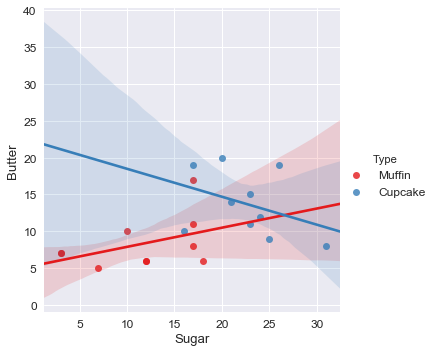

In [12]:
sns.lmplot('Sugar', 'Butter', data = data, hue = 'Type', palette ='Set1')

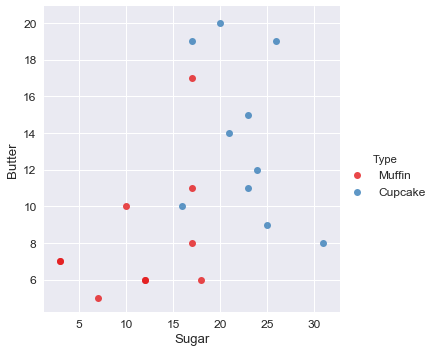

In [13]:
sns.lmplot('Sugar', 'Butter', data = data, hue = 'Type', palette ='Set1', fit_reg = False)

In [15]:
sugar_butter = data[['Sugar', 'Butter']].as_matrix()
type_label = np.where(data['Type'] == 'Muffin', 0,1)

In [16]:
model = svm.SVC(kernel = 'linear')
model.fit(sugar_butter, type_label)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [18]:
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(5,30)
yy = a * xx - (model.intercept_[0]) / w[1]

b = model.support_vectors_[0]
yy_down = a * xx + (b[1] - a * b[0])
b = model.support_vectors_[-1]
yy_up = a * xx + (b[1] - a * b[0])

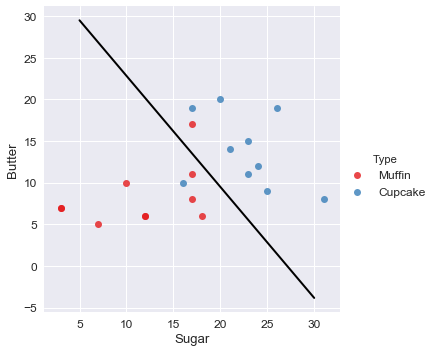

In [20]:
sns.lmplot('Sugar', 'Butter', data = data, hue = 'Type', palette = 'Set1', fit_reg=False)
plt.plot(xx, yy, linewidth = 2, color = 'black')

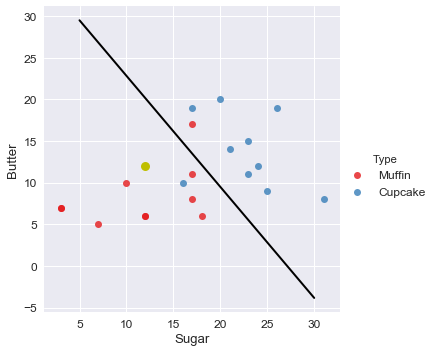

In [21]:
sns.lmplot('Sugar', 'Butter', data = data, hue = 'Type', palette = 'Set1', fit_reg=False)
plt.plot(xx, yy, linewidth = 2, color = 'black')
plt.plot(12, 12, 'yo', markersize = '9')

In [22]:
def muffin_or_cupcake(butter, sugar):
    if(model.predict([[butter, sugar]])) == 0:
        print('Its a muffin')
    else:
        print('Its a cupcake')

In [26]:
muffin_or_cupcake(12,12)

Its a muffin
